In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

# Load data
csv_features = "./Dataset/acsincome_ca_features.csv"
csv_labels = "./Dataset/acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.05
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Scaler for data standardization
scaler = StandardScaler()

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

On ne standardize que les sets de feature, les labels (Y) correspondant à des booléens n'ont pas besoin d'être standardisés.

# Gradient Boosting

In [10]:
GB_def = GradientBoostingClassifier()

GB_def.fit(X_train, Y_train)
print("Model score on test dataset :  ", GB_def.score(X_test, Y_test))
# print("Model score on train dataset : ", GB_def.score(X_train, Y_train))

Model score on test dataset :   0.8002043944813491


Model score on train dataset : 0.8740

Model score on test dataset with 1% : 0.7704

with 10% : 0.8076

with 20% : 0.8160

with 50% : 0.8154

with 100 % : 0.8132

In [3]:
score = cross_val_score(GB_def, X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les paramètres défaut : {score:.4f}")

Score moyen obtenu par cross validation du modèle avec les paramètres défaut : 0.8094


## 1. Recherche de paramètres : 

Paramètres défaut : param_def ={
    
    loss : log_loss,

    learning_rate : 0.1,

    n_estimators : 100,
    
    criterion : friedman_mse,

    min_samples_split : 2,

    min_samples_leaf : 1,

    max_depth : 3
} 

### Loss

Score pour le paramètre loss log_loss :  0.8093533921715039
Score pour le paramètre loss exponential :  0.8117814255811391


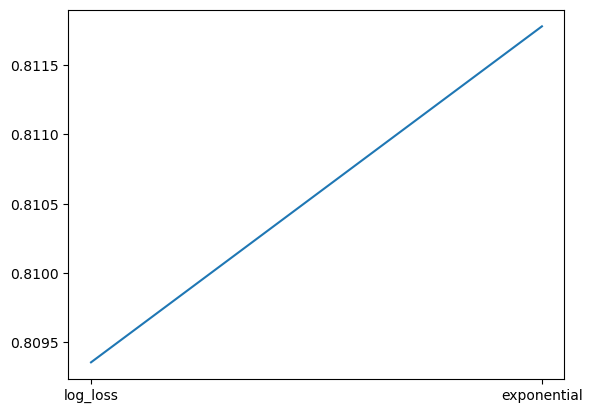

In [2]:
val_score = []
tab =['log_loss', 'exponential'] 
for l in tab:
    score = cross_val_score(GradientBoostingClassifier(loss=l), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre loss", l, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

exponential a l'air meilleur

### Learning_rate

Score pour le paramètre learning_rate 0.1 :  0.8092255966443475
Score pour le paramètre learning_rate 0.2 :  0.813569746897939
Score pour le paramètre learning_rate 0.3 :  0.8162534529682265
Score pour le paramètre learning_rate 0.4 :  0.8140810922192436
Score pour le paramètre learning_rate 0.5 :  0.8069254403682079
Score pour le paramètre learning_rate 1.0 :  0.7928694012950925
Score pour le paramètre learning_rate 2.0 :  0.4058288959886404


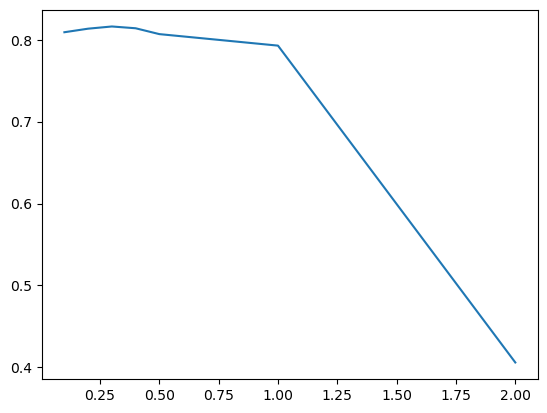

In [3]:
val_score = []
tab =[0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0] 
for l in tab:
    score = cross_val_score(GradientBoostingClassifier(learning_rate=l), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre learning_rate", l, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Meilleur : 0.3

### n_estimators

Score pour le paramètre n_estimators 100 :  0.8093533921715039
Score pour le paramètre n_estimators 200 :  0.8145928455722441
Score pour le paramètre n_estimators 500 :  0.8198305852398615
Score pour le paramètre n_estimators 600 :  0.8179142235768875
Score pour le paramètre n_estimators 700 :  0.8176586325225743
Score pour le paramètre n_estimators 800 :  0.8152301910812433


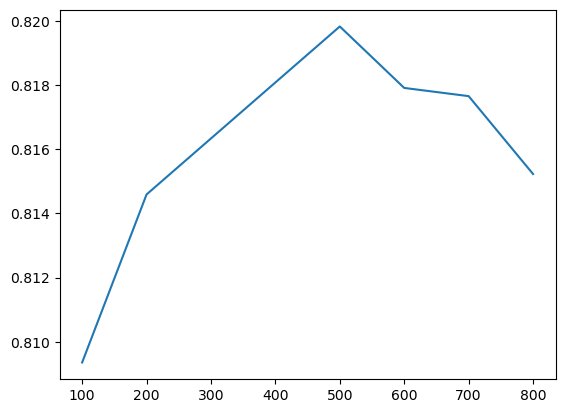

In [4]:
val_score = []
tab = [100, 200, 500, 600, 700, 800]
for n in tab:
    score = cross_val_score(GradientBoostingClassifier(n_estimators=n), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre n_estimators", n, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Pic à 500.

### criterion

Score pour le paramètre criterion friedman_mse :  0.8093533921715039
Score pour le paramètre criterion squared_error :  0.8093533921715039


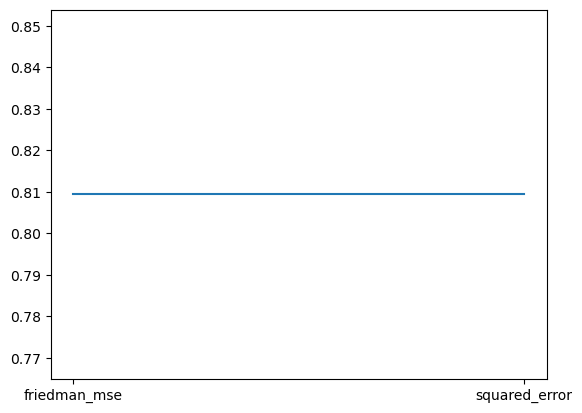

In [5]:
val_score = []
tab = ['friedman_mse','squared_error']
for c in tab:
    score = cross_val_score(GradientBoostingClassifier(criterion=c), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre criterion", c, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

meilleur en friedman_mse

### min_samples_split

Score pour le paramètre min_samples_split 2 :  0.8094811876986604
Score pour le paramètre min_samples_split 8 :  0.8106311026240519
Score pour le paramètre min_samples_split 10 :  0.8110144892055213
Score pour le paramètre min_samples_split 12 :  0.8099921249882691
Score pour le paramètre min_samples_split 20 :  0.8099924514136256
Score pour le paramètre min_samples_split 30 :  0.8089700871963734
Score pour le paramètre min_samples_split 50 :  0.8087140881103643
Score pour le paramètre min_samples_split 100 :  0.8082029876080774


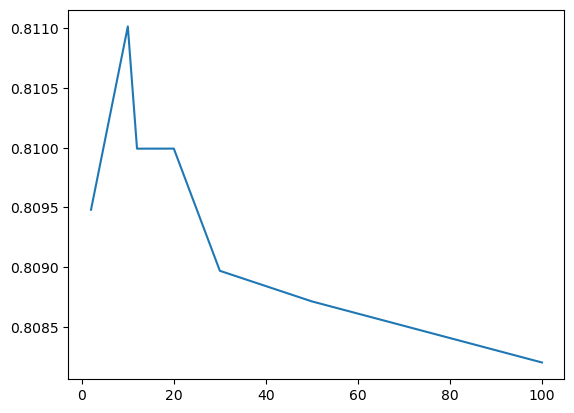

In [6]:
val_score = []
tab = [2, 8, 10, 12, 20, 30, 50, 100]
for m in tab :
    score = cross_val_score(GradientBoostingClassifier(min_samples_split=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_split", m, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Pic à 10 pour 5% du dataset

Pic à 10 puis 50 pour 10% du dataset, possible que ça évolue en faisant évoluer la taille du dataset

### min_samples_leaf

Score pour le paramètre min_samples_leaf 1 :  0.8094811876986604
Score pour le paramètre min_samples_leaf 2 :  0.8093529025334687
Score pour le paramètre min_samples_leaf 3 :  0.8107588165448693
Score pour le paramètre min_samples_leaf 4 :  0.809864084642095
Score pour le paramètre min_samples_leaf 5 :  0.8097359626895818
Score pour le paramètre min_samples_leaf 6 :  0.8112695906217994
Score pour le paramètre min_samples_leaf 7 :  0.8103751851443819
Score pour le paramètre min_samples_leaf 10 :  0.8103751035380429
Score pour le paramètre min_samples_leaf 20 :  0.810631184230391
Score pour le paramètre min_samples_leaf 30 :  0.8113975493616344


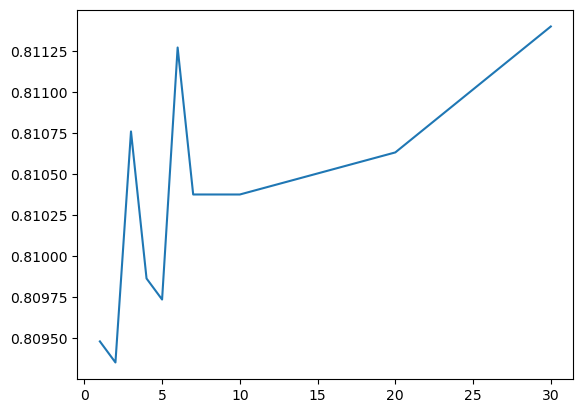

In [7]:
val_score = []
tab = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30]
for m in tab :
    score = cross_val_score(GradientBoostingClassifier(min_samples_leaf=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre min_samples_leaf", m, ": ",score)
    val_score.append(score)

plt.plot(tab, val_score)

Pic à 3, 6, 30 pour 5%

Peut être limiter pour contrôler la complexité de l'arbre.

### max_depth

Score pour le paramètre max_depth None :  0.7339662721000166
Score pour le paramètre max_depth 2 :  0.8088421284565385
Score pour le paramètre max_depth 3 :  0.8094811876986604
Score pour le paramètre max_depth 4 :  0.8119091395019566
Score pour le paramètre max_depth 5 :  0.812931993357244
Score pour le paramètre max_depth 6 :  0.8108864488593474
Score pour le paramètre max_depth 8 :  0.8025815349336336


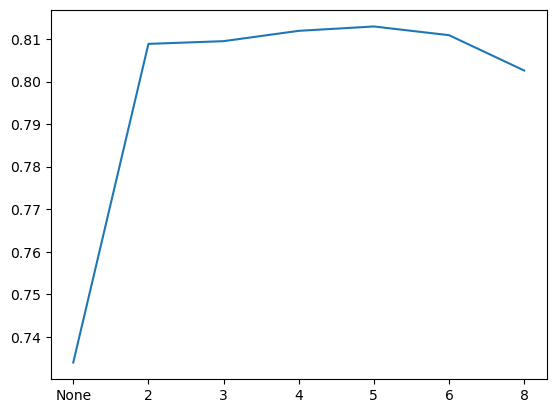

In [8]:
val_score = []
tab =[None, 2, 3, 4, 5, 6, 8] 
for m in tab:
    score = cross_val_score(GradientBoostingClassifier(max_depth=m), X_train, Y_train, cv=5).mean()
    print("Score pour le paramètre max_depth", m, ": ",score)
    val_score.append(score)

tab =['None', 2, 3, 4, 5, 6, 8] 
plt.plot(tab, val_score)

Le plus efficace autour de 5

## 2. Evaluation de la qualité du modèle avec les paramètres choisis

In [2]:
GB_model = GradientBoostingClassifier(loss='exponential', n_estimators=500, criterion='friedman_mse', min_samples_split=10,
                                  min_samples_leaf=6, max_depth=6)
GB_model.fit(X_train, Y_train)
print("modele entrainé")

modele entrainé


### Validation croisée

In [5]:
score = cross_val_score(GB_model, X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les paramètres choisis : {score:.4f}")

Score moyen obtenu par cross validation du modèle avec les paramètres choisis : 0.8036


### Accuracy

In [23]:
predictions = GB_model.predict(X_test)

res = pd.Series(predictions)
res.value_counts()

False    1114
True      843
Name: count, dtype: int64

In [24]:
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7961


### Classification report

In [25]:
report = classification_report(Y_test, predictions)
print('Classification Report y_test et predictions pour GradientBoosting :\n', report)

Classification Report y_test et predictions en svm:
               precision    recall  f1-score   support

       False       0.84      0.81      0.82      1165
        True       0.73      0.78      0.76       792

    accuracy                           0.80      1957
   macro avg       0.79      0.79      0.79      1957
weighted avg       0.80      0.80      0.80      1957



### Confusion Matrix

In [26]:
conf_matrix = confusion_matrix(Y_test, predictions)
print('Confusion Matrix Y_test et predictions pour GradientBoosting :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[940 225]
 [174 618]]


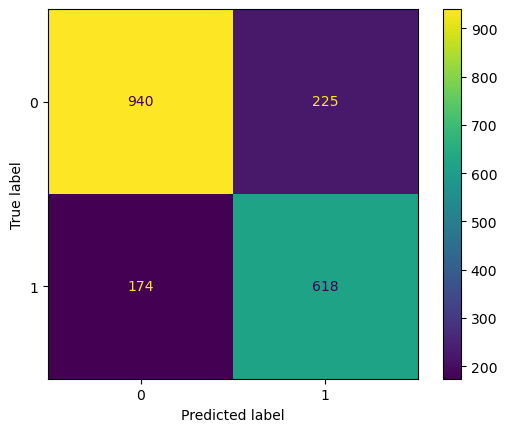

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## 3. Gridsearch

13 min pour 1% du dataset

In [3]:
param_grid ={
    'loss' :['exponential'],
    'learning_rate' :[0.2, 0.3, 0.4] ,
    'n_estimators' :[450, 500, 550],
    'min_samples_split' :[8, 10],
    'min_samples_leaf' :[3, 6],
    'max_depth' : [3, 4, 5]
} 
grid= GridSearchCV(estimator= GradientBoostingClassifier(random_state=0),
                   param_grid=param_grid, scoring='accuracy', cv=5)

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'loss': ['exponential'], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [8, 10],
                         'n_estimators': [450, 500, 550]},
             scoring='accuracy')

In [4]:
print("best score : ",grid.best_score_)

print("best parameters : ", grid.best_params_)

best score :  0.7877201605636109
best parameters :  {'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 550}


In [5]:
Best_RF = grid.best_estimator_
# Best_RF = GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=550)

In [6]:
Best_RF.score(X_test, Y_test)

0.7653061224489796

## 4. Evaluation de la qualité du modèle avec les meilleurs hyperparamètres

### Validation croisée

validation croisée avec les meilleurs paramètres gridsearch calculés sur 1% du trainset et utilisés sur 5% du dataset

In [6]:
score = cross_val_score(GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=550), X_train, Y_train, cv=5).mean()
print(f"Score moyen obtenu par cross validation du modèle avec les hyperparamètres Gridsearch : {score:.4f}")

Score moyen obtenu par cross validation du modèle avec les hyperparamètres Gridsearch : 0.7980


### Accuracy

In [7]:
Best_predictions = Best_RF.predict(X_test)

Best_res = pd.Series(Best_predictions)
Best_res.value_counts()

False    255
True     137
Name: count, dtype: int64

In [8]:
Best_accuracy = accuracy_score(Y_test, Best_predictions)
print(f'Accuracy : {Best_accuracy:.4f}')

Accuracy : 0.7653


### Classification report

In [12]:
Best_report = classification_report(Y_test, Best_predictions)
print('Classification Report y_test et predictions pour GradientBoosting :\n', Best_report)

Classification Report y_test et predictions pour GradientBoosting :
               precision    recall  f1-score   support

       False       0.75      0.88      0.81       217
        True       0.80      0.63      0.71       175

    accuracy                           0.77       392
   macro avg       0.77      0.75      0.76       392
weighted avg       0.77      0.77      0.76       392



### Confusion Matrix

In [10]:
conf_matrix = confusion_matrix(Y_test, Best_predictions)
print('Confusion Matrix Y_test et predictions pour GradientBoosting :\n', conf_matrix)

Confusion Matrix Y_test et predictions en svm :
 [[190  27]
 [ 65 110]]


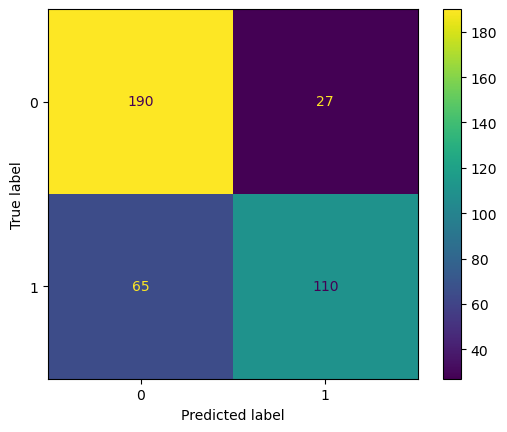

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Projection sur les données du Nevada et du Colorado

## 1. Nevada

In [16]:
# Load data
csv_featuresNE = "./Dataset/acsincome_ne_allfeaturesTP2.csv"
csv_labelsNE = "./Dataset/acsincome_ne_labelTP2.csv"
featuresNE = pd.read_csv(csv_featuresNE)
labelsNE = pd.read_csv(csv_labelsNE)

# Separating features and labels, shuffling
Xne_all = featuresNE
Yne_all = labelsNE
Xne,Yne = shuffle(Xne_all,Yne_all, random_state=0)

# Scaler for data standardization
scaler = StandardScaler()

Xne = scaler.fit_transform(Xne)

On travaille sur 100% des données disponibles pour le Nevada car le dataset est sensiblement plus petit.

In [4]:
print("taille du dataset pour le Nevada : ", Xne.shape)

print("Répartition des résultats au Nevada : ", Yne.value_counts())

taille du dataset pour le Nevada :  (10785, 10)
Répartition des résultats au Nevada :  PINCP
0        7417
1        3368
Name: count, dtype: int64


Pas de réentrainement des modèles, on récupère le modèle entraîné (**GB_model**) avec les données de Californie pour appliquer le modèle aux données du Nevada et voir si cela peut permettre d'avoir de bons résultats de prédictions.

### Accuracy

In [17]:
predictionsNE = GB_model.predict(Xne)

res = pd.Series(predictionsNE)
res.value_counts()

False    6156
True     4629
Name: count, dtype: int64

In [18]:
accuracy = accuracy_score(Yne, predictionsNE)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7242


### Classification report

In [19]:
report = classification_report(Yne, predictionsNE)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      7417
           1       0.54      0.75      0.63      3368

    accuracy                           0.72     10785
   macro avg       0.70      0.73      0.70     10785
weighted avg       0.76      0.72      0.73     10785



### Confusion Matrix

In [20]:
conf_matrix = confusion_matrix(Yne, predictionsNE)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[5299 2118]
 [ 857 2511]]


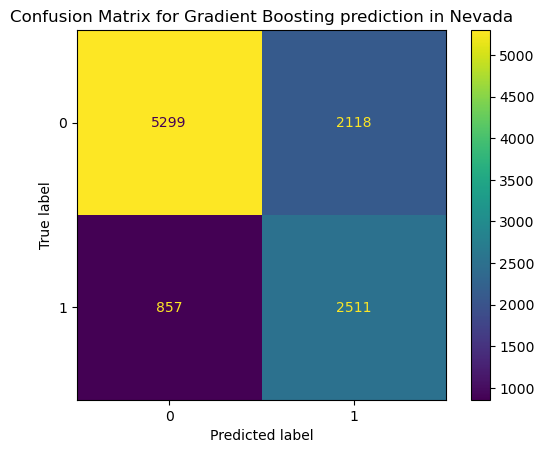

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix for Gradient Boosting prediction in Nevada")
plt.show()

## 2. Colorado

In [9]:
# Load data
csv_featuresCO = "./Dataset/acsincome_co_allfeaturesTP2.csv"
csv_labelsCO = "./Dataset/acsincome_co_labelTP2.csv"
featuresCO = pd.read_csv(csv_featuresCO)
labelsCO = pd.read_csv(csv_labelsCO)

# Separating features and labels, shuffling
Xco_all = featuresCO
Yco_all = labelsCO
Xco,Yco = shuffle(Xco_all,Yco_all, random_state=0)

# Scaler for data standardization
scaler = StandardScaler()

Xco = scaler.fit_transform(Xco)

On travaille sur 100% des données disponibles pour le Colorado car le dataset est sensiblement plus petit.

In [10]:
print("taille du dataset pour le Nevada : ", Xco.shape)

print("Répartition des résultats au Nevada : ", Yco.value_counts())

taille du dataset pour le Nevada :  (31306, 10)
Répartition des résultats au Nevada :  PINCP
0        18334
1        12972
Name: count, dtype: int64


Pas de réentrainement des modèles, on récupère le modèle entraîné (**GB_model**) avec les données de Californie pour appliquer le modèle aux données du Colorado et voir si cela peut permettre d'avoir de bons résultats de prédictions.

### Accuracy

In [11]:
predictionsCO = GB_model.predict(Xco)

res = pd.Series(predictionsCO)
res.value_counts()

False    18943
True     12363
Name: count, dtype: int64

In [12]:
accuracy = accuracy_score(Yco, predictionsCO)
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7572


### Classification report

In [13]:
report = classification_report(Yco, predictionsCO)
print('Classification Report y_test et predictions pour svm :\n', report)

Classification Report y_test et predictions pour svm :
               precision    recall  f1-score   support

           0       0.78      0.81      0.80     18334
           1       0.72      0.68      0.70     12972

    accuracy                           0.76     31306
   macro avg       0.75      0.75      0.75     31306
weighted avg       0.76      0.76      0.76     31306



### Confusion Matrix

In [14]:
conf_matrix = confusion_matrix(Yco, predictionsCO)
print('Confusion Matrix Y_test et predictions pour SVM :\n', conf_matrix)

Confusion Matrix Y_test et predictions pour SVM :
 [[14838  3496]
 [ 4105  8867]]


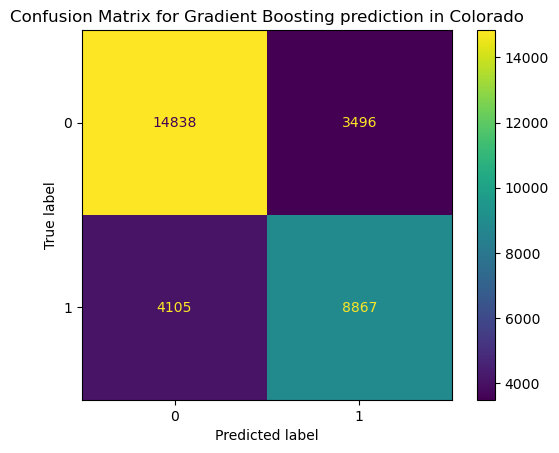

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix for Gradient Boosting prediction in Colorado")
plt.show()